# Clustering

## Problem Statement

Students have to evaluate a lot of factors before taking a decision to join a university for their higher education requirements.
The objective of this project is to simplify the process of applying for appropriate universities which are of similar nature. 

`CRISP-ML(Q)` process model describes six phases:

1. Business and Data Understanding
2. Data Preparation
3. Model Building
4. Model Evaluation
5. Deployment
6. Monitoring and Maintenance

**Objective(s):** Maximize the convenience of admission process

**Constraints:** Minimize the brain drain


**Success Criteria**

- **Business Success Criteria**: Reduce the application process time from anywhere between 20% to 40%

- **ML Success Criteria**: Achieve Silhoutte coefficient of atleast 0.6

- **Economic Success Criteria**: US Higher education department will see an increase in revenues by atleast 30%

**Proposed Plan:**
Grouping the available universities will allow to understand the characteristics of each group.

## Data Collection

Data: 
   The university details are obtained from the US Higher Education Body and is publicly available for students to access.

Data Dictionary:
- Dataset contains 25 university details
- 7 features are recorded for each university

Description:
- Univ - University Name
- State - Location (state) of the university
- SAT - Average SAT score for eligibility
- Top10 - % of students who ranked in top 10 in their previous academics
- Accept - % of students admitted to the universities
- SFRatio - Student to Faculty ratio
- Expenses - Overall cost in USD
- GradRate - % of students who graduate

In [1]:
!pip install feature_engine

     -------------------------------------- 328.9/328.9 kB 3.4 MB/s eta 0:00:00


**Importing required packages**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
from sklearn import preprocessing
from feature_engine.outliers import Winsorizer

**Import the data**

In [4]:
df = pd.read_excel(r'C:\Users\marco\OneDrive\Documents\Python Scripts\Freelance\University.xlsx')
df

,Univ,State,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,RI,1310,89,22,13,22704,94
1,CalTech,CA,1415,100,25,6,63575,81
2,CMU,PA,1260,62,59,9,25026,72
3,Columbia,NY,1310,76,24,12,31510,88
4,Cornell,NY,1280,83,33,13,21864,90
5,Dartmouth,NH,1340,89,23,10,32162,95
6,Duke,NC,1315,90,30,12,31585,95
7,Georgetown,DC,1255,74,24,12,20126,92
8,Harvard,MA,1400,91,14,11,39525,97
9,JohnsHopkins,MD,1305,75,44,7,58691,87


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Univ      25 non-null     object
 1   State     25 non-null     object
 2   SAT       25 non-null     int64 
 3   Top10     25 non-null     int64 
 4   Accept    25 non-null     int64 
 5   SFRatio   25 non-null     int64 
 6   Expenses  25 non-null     int64 
 7   GradRate  25 non-null     int64 
dtypes: int64(6), object(2)
memory usage: 1.7+ KB


## EXPLORATORY DATA ANALYSIS (EDA) / DESCRIPTIVE STATISTICS

***1st Moment Business Decision (Measures of Central Tendency)***

1) Mean

2) Median

3) Mode

In [6]:
print(df.mean())
print('\n')
print(df.median())
print('\n')
print(df.mode())

SAT          1266.44
Top10          76.48
Accept         39.20
SFRatio        12.72
Expenses    27388.00
GradRate       86.72
dtype: float64


SAT          1285.0
Top10          81.0
Accept         36.0
SFRatio        12.0
Expenses    27553.0
GradRate       90.0
dtype: float64


            Univ State     SAT  Top10  Accept  SFRatio  Expenses  GradRate
0          Brown    CA  1255.0   75.0    14.0     11.0      8704      95.0
1            CMU    PA  1260.0   89.0    24.0     12.0      9066       NaN
2        CalTech   NaN  1310.0   90.0    30.0     13.0     10185       NaN
3       Columbia   NaN  1375.0   91.0    44.0      NaN     11857       NaN
4        Cornell   NaN     NaN   95.0     NaN      NaN     13349       NaN
5      Dartmouth   NaN     NaN    NaN     NaN      NaN     15122       NaN
6           Duke   NaN     NaN    NaN     NaN      NaN     15140       NaN
7     Georgetown   NaN     NaN    NaN     NaN      NaN     15470       NaN
8        Harvard   NaN     NaN    NaN     NaN

C:\Users\marco\AppData\Local\Temp\ipykernel_15052\648249112.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.mean())
C:\Users\marco\AppData\Local\Temp\ipykernel_15052\648249112.py:3: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.median())


***2nd Moment Business Decision (Measures of Dispersion)***

1) Variance

2) Standard deviation

3) Range (maximum - minimum)

In [7]:
print(df.var())
print('\n')
print(df.std())

SAT         1.174184e+04
Top10       3.776767e+02
Accept      3.891667e+02
SFRatio     1.654333e+01
Expenses    2.080773e+08
GradRate    8.204333e+01
dtype: float64


SAT           108.359771
Top10          19.433905
Accept         19.727308
SFRatio         4.067350
Expenses    14424.883165
GradRate        9.057778
dtype: float64


C:\Users\marco\AppData\Local\Temp\ipykernel_15052\2422590520.py:1: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.var())
C:\Users\marco\AppData\Local\Temp\ipykernel_15052\2422590520.py:3: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.std())


***3rd Business Moment Decision (Skewness)***

Measure of asymmetry in the data distribution

In [8]:
df.skew()

C:\Users\marco\AppData\Local\Temp\ipykernel_15052\1665899112.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


SAT        -0.950910
Top10      -1.219756
Accept      0.867538
SFRatio     1.120719
Expenses    0.852350
GradRate   -0.999521
dtype: float64

***4th Business Moment Decision (Kurtosis)***

Measure of peakedness - represents the overall spread in the data

In [9]:
df.kurt()

C:\Users\marco\AppData\Local\Temp\ipykernel_15052\1257127604.py:1: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.kurt()


SAT         0.355122
Top10       0.700307
Accept      0.252908
SFRatio     2.353743
Expenses    0.638162
GradRate   -0.164740
dtype: float64

***Descriptive Statistics and Data Distribution Function***

In [10]:
df.describe()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
count,25.000000,25.000000,25.000000,25.00000,25.000000,25.000000
mean,1266.440000,76.480000,39.200000,12.72000,27388.000000,86.720000
std,108.359771,19.433905,19.727308,4.06735,14424.883165,9.057778
min,1005.000000,28.000000,14.000000,6.00000,8704.000000,67.000000
25%,1240.000000,74.000000,24.000000,11.00000,15140.000000,81.000000
50%,1285.000000,81.000000,36.000000,12.00000,27553.000000,90.000000
75%,1340.000000,90.000000,50.000000,14.00000,34870.000000,94.000000
max,1415.000000,100.000000,90.000000,25.00000,63575.000000,97.000000


## Data Preprocessing and Cleaning

**Typecasting** :

As Python automatically interprets the data types, there may be a requirement for the data type to be converted. The process of converting one data type to another data type is called Typecasting.

Example: 
1) int to float

2) float to int

In [11]:
df.dtypes

Univ        object
State       object
SAT          int64
Top10        int64
Accept       int64
SFRatio      int64
Expenses     int64
GradRate     int64
dtype: object

The dataset contains UnivID which is being interpreted as Integer by Python. UnivID is an identity and a unique number given to each university. Hence it should be treated as a categorical data. We can convert the integer data to string type.

In [12]:
# Convert 'int64' to 'str' (string) type.

df.UnivID = df.UnivID.astype('str')
df.dtypes

AttributeError: 'DataFrame' object has no attribute 'UnivID'

**Cleaning Unwanted columns**

UnivID is an identity to each university. Analytically it does not have any value (Nominal data). We can safely ignore the ID column by dropping the column.

In [11]:
df.drop(['UnivID'], axis = 1, inplace = True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Univ      25 non-null     object 
 1   State     25 non-null     object 
 2   SAT       24 non-null     float64
 3   Top10     25 non-null     int64  
 4   Accept    25 non-null     int64  
 5   SFRatio   24 non-null     float64
 6   Expenses  25 non-null     int64  
 7   GradRate  24 non-null     float64
dtypes: float64(3), int64(3), object(2)
memory usage: 1.7+ KB


**Handling duplicates:**

If the dataset has multiple entries of the same record then we can remove the duplicate entries. In our dataset we don't have duplicates. In case of duplicates we will use function drop_duplicates()

In [13]:
duplicate = df.duplicated()  # Returns Boolean Series denoting duplicate rows.
print(duplicate)
sum(duplicate)

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
dtype: bool


0

In [14]:
# Removing Duplicates
df = df.drop_duplicates() # Returns DataFrame with duplicate rows removed.

**Missing Value Analysis**

***IMPUTATION:***

The process of dealing with missing values is called Imputation.

Most popular substitution based Imputation techniques are:

1) Mean imputation for numeric data

2) Mode imputation for non-numeric data

In [15]:
df.isnull().sum() # Check for missing values

Univ        0
State       0
SAT         1
Top10       0
Accept      0
SFRatio     1
Expenses    0
GradRate    1
dtype: int64

In [16]:
type(df["SAT"])

pandas.core.series.Series

In [17]:
type(df[["SAT"]])

pandas.core.frame.DataFrame

In [18]:
from sklearn.impute import SimpleImputer

# Mean Imputer 
mean_imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
df["SAT"] = pd.DataFrame(mean_imputer.fit_transform(df[["SAT"]]))

df["SAT"].isna().sum()

0

In [19]:
# Median Imputer
median_imputer = SimpleImputer(missing_values = np.nan, strategy = 'median')
df["SFRatio"] = pd.DataFrame(median_imputer.fit_transform(df[["SFRatio"]]))

df["SFRatio"].isna().sum()  # all records replaced by median 

0

In [20]:
# Random Imputer
from feature_engine.imputation import RandomSampleImputer

random_imputer = RandomSampleImputer(['GradRate'])
df["GradRate"] = pd.DataFrame(random_imputer.fit_transform(df[["GradRate"]]))

df["GradRate"].isna().sum()  # all records replaced by a random value

0

In [21]:
df.isna().sum()

Univ        0
State       0
SAT         0
Top10       0
Accept      0
SFRatio     0
Expenses    0
GradRate    0
dtype: int64

## Single code for Mean Imputation on the entire dataset.
#### Alternative option

In [22]:
df.fillna(df.mean(), inplace = True)

C:\Users\Bharani Kumar\AppData\Local\Temp\ipykernel_9440\2622515659.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(), inplace = True)


**Outliers Analysis**:

Extreme data values in a variable can be outliers. In case of outliers we can use one of the strategies of 3 R (Rectify, Retain, or Remove)

**Dividing Categorical and Numerical variables from dataset**

In [23]:
df_cate = df.iloc[:, :2]
df_cate.head()

,Univ,State
0,Brown,RI
1,CalTech,CA
2,CMU,PA
3,Columbia,NY
4,Cornell,NY


In [24]:
df_num = df.iloc[:, 2:]
df_num.head()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,1310.0,89,22,13.0,22704,94.0
1,1415.0,100,25,6.0,63575,81.0
2,1260.0,62,59,9.0,25026,72.0
3,1310.0,76,24,12.0,31510,80.0
4,1280.0,83,33,13.0,21864,90.0


**Box Plot**

Visualize numeric data using boxplot for outliers

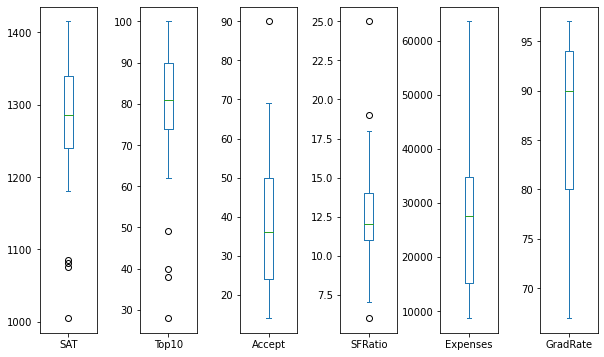

In [25]:
# Multiple boxplots in a single visualization.
# Columns with larger scales affect other columns. 
# Below code ensures each column gets its own y-axis.

# pandas plot() function with parameters kind = 'box' and subplots = True

df_num.plot(kind = 'box', subplots = True, sharey = False, figsize = (10, 6)) 

'''sharey True or 'all': x- or y-axis will be shared among all subplots.
False or 'none': each subplot x- or y-axis will be independent.'''


# increase spacing between subplots
plt.subplots_adjust(wspace = 0.75) # ws is the width of the padding between subplots, as a fraction of the average Axes width.
plt.show()  

Boxplots show outliers in: SAT, Top10, Accept, SFRatio.

***Outlier Analysis***: 
We shall use Winsorization Technique to treat outliers

Winsorization function rounds off the exceptional data points based on capping method used in parameters/hyperparameters section.

In [26]:
# D-Tale
########

# pip install dtale
import dtale

d = dtale.show(df)
d.open_browser()

#### Install the required package if it is not already available
***Package to get winsorization function***

!pip install feature_engine       

In [27]:
# Winsorization for "SAT, Top10, Accept, SFRatio" column
winsor = Winsorizer(capping_method = 'iqr', # choose IQR rule boundary
                          tail = 'both', # cap left, right or both tails 
                          fold = 1.5,
                          variables = ['SAT'])

df_num['SAT'] = winsor.fit_transform(df_num[['SAT']]) # this is replacing the outliers to cap values


In [28]:
# Winsorization for "Top10" column
winsor = Winsorizer(capping_method = 'iqr', # choose IQR rule boundary
                          tail = 'both', # cap left, right or both tails 
                          fold = 1.5,
                          variables = ['Top10'])

df_num['Top10'] = winsor.fit_transform(df_num[['Top10']]) # this is replacing the outliers to cap values


In [29]:
# Winsorization for "Accept" column
winsor = Winsorizer(capping_method = 'iqr', # choose IQR rule boundary
                          tail = 'both', # cap left, right or both tails 
                          fold = 1.5,
                          variables = ['Accept'])

df_num['Accept'] = winsor.fit_transform(df_num[['Accept']]) # this is replacing the outliers to cap values

In [30]:
# Winsorization for "SFRatio" column
winsor = Winsorizer(capping_method = 'iqr', # choose IQR rule boundaries
                          tail = 'both', # cap left, right or both tails 
                          fold = 1.5,
                          variables = ['SFRatio'])

df_num['SFRatio'] = winsor.fit_transform(df_num[['SFRatio']]) # this is replacing the outliers to cap values

#### Verify for outliers post the treatment

C:\Users\Bharani Kumar\AppData\Local\Temp\ipykernel_9440\3384803453.py:6: UserWarning:

Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.

2022-09-29 18:52:41,675 - WARNING  - findfont: Font family ['Heiti TC'] not found. Falling back to DejaVu Sans.


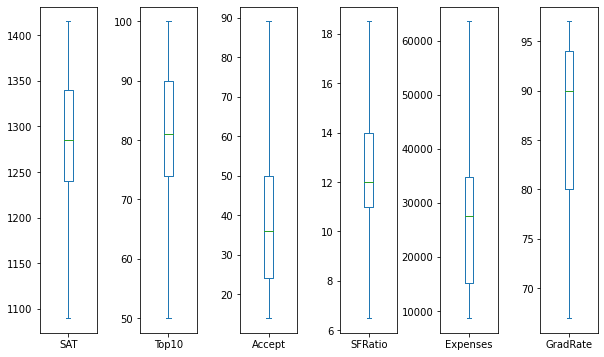

In [31]:
df_num.plot(kind = 'box', subplots = True, sharey = False, figsize = (10, 6)) # sharey = True shares the Y axis across all plots


# increase spacing between subplots
plt.subplots_adjust(wspace = 0.75) 
plt.show()  

**Zero and near zero variance**

   We dont have any values with near zero (or) zero variance. We can proceed with further data preprocessing steps.

In [32]:
df_num.var()

SAT         9.718958e+03
Top10       2.446267e+02
Accept      3.849733e+02
SFRatio     1.105583e+01
Expenses    2.080773e+08
GradRate    8.375000e+01
dtype: float64

**Discretization / Binning / Grouping:**

The process of converting continuous data into discrete number of bins.

The current business requirement does not justify the discretization/binning requirement for any column.

### Dummy Variable Creation

In [33]:
df.dtypes  #Verify the data types of the fields for the entire data

Univ         object
State        object
SAT         float64
Top10         int64
Accept        int64
SFRatio     float64
Expenses      int64
GradRate    float64
dtype: object

In [34]:
# Alternatively we can use:

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 0 to 24
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Univ      25 non-null     object 
 1   State     25 non-null     object 
 2   SAT       25 non-null     float64
 3   Top10     25 non-null     int64  
 4   Accept    25 non-null     int64  
 5   SFRatio   25 non-null     float64
 6   Expenses  25 non-null     int64  
 7   GradRate  25 non-null     float64
dtypes: float64(3), int64(3), object(2)
memory usage: 1.8+ KB


In [35]:
df_cate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Univ    25 non-null     object
 1   State   25 non-null     object
dtypes: object(2)
memory usage: 600.0+ bytes


In [36]:
print(df_cate.State.unique())
print('\n')

print(df_cate.State.value_counts())

['RI' 'CA' 'PA' 'NY' 'NH' 'NC' 'DC' 'MA' 'MD' 'IL' 'IN' 'NJ' 'TX' 'MI'
 'VA' 'WI' 'CT']


PA    3
CA    3
NY    2
MA    2
IL    2
IN    2
RI    1
TX    1
WI    1
VA    1
MI    1
MD    1
NJ    1
DC    1
NC    1
NH    1
CT    1
Name: State, dtype: int64


- Univ name is an identity and does not require to be converted into numeric values.

- STATE column is an important field in decision making hence it is to be converted into Numeric values.

In [37]:
# Applying One-Hot Encoding with get_dummies

df_cate = pd.get_dummies(df_cate, columns = ['State'], drop_first = True)

In [38]:
df_cate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 0 to 24
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Univ      25 non-null     object
 1   State_CT  25 non-null     uint8 
 2   State_DC  25 non-null     uint8 
 3   State_IL  25 non-null     uint8 
 4   State_IN  25 non-null     uint8 
 5   State_MA  25 non-null     uint8 
 6   State_MD  25 non-null     uint8 
 7   State_MI  25 non-null     uint8 
 8   State_NC  25 non-null     uint8 
 9   State_NH  25 non-null     uint8 
 10  State_NJ  25 non-null     uint8 
 11  State_NY  25 non-null     uint8 
 12  State_PA  25 non-null     uint8 
 13  State_RI  25 non-null     uint8 
 14  State_TX  25 non-null     uint8 
 15  State_VA  25 non-null     uint8 
 16  State_WI  25 non-null     uint8 
dtypes: object(1), uint8(16)
memory usage: 800.0+ bytes


In [39]:
# The dimension of the dataset after One-Hot Encoding

df_cate.shape

(25, 17)

In [40]:
df_cate.head()

,Univ,State_CT,State_DC,State_IL,State_IN,State_MA,State_MD,State_MI,State_NC,State_NH,State_NJ,State_NY,State_PA,State_RI,State_TX,State_VA,State_WI
0,Brown,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,CalTech,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,CMU,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,Columbia,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,Cornell,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


# **Graphical Representation**

In [2]:
pip install PyQt5 pyqtwebengine --user # run this if you get any warning msg and if the plots are not visible

Note: you may need to restart the kernel to use updated packages.


In [85]:
%matplotlib inline

In [86]:
df_num.columns

Index(['SAT', 'Top10', 'Accept', 'SFRatio', 'Expenses', 'GradRate'], dtype='object')

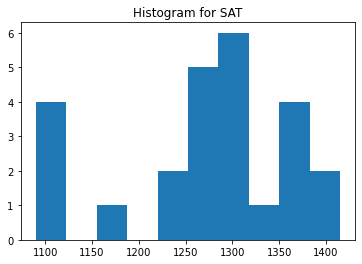

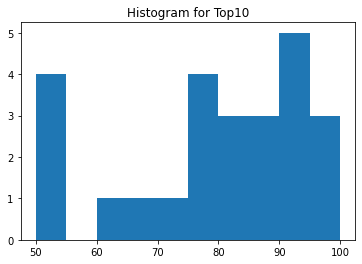

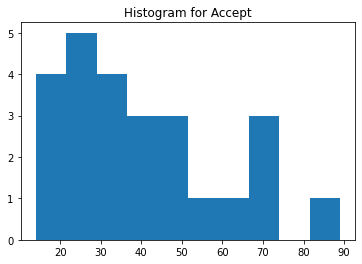

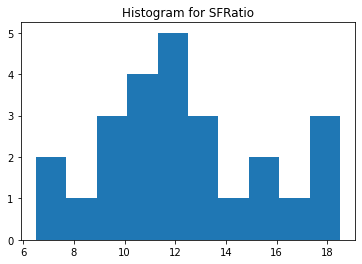

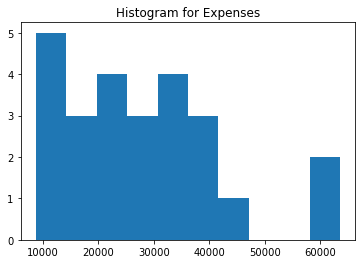

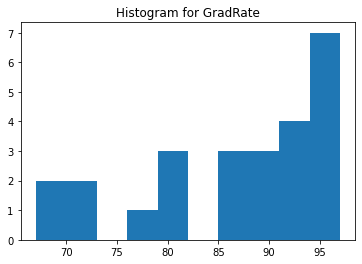

In [52]:
# Histogram describes the spread of data

for i in df_num.columns:
  plt.hist(x = df_num[i])
  plt.title("Histogram for " + str(i))
  plt.show()


((array([-1.9213301 , -1.50368257, -1.24941883, -1.0573306 , -0.897955  ,
         -0.75865603, -0.63273432, -0.51614096, -0.40618759, -0.30094875,
         -0.19894932, -0.09898372,  0.        ,  0.09898372,  0.19894932,
          0.30094875,  0.40618759,  0.51614096,  0.63273432,  0.75865603,
          0.897955  ,  1.0573306 ,  1.24941883,  1.50368257,  1.9213301 ]),
  array([1090.        , 1090.        , 1090.        , 1090.        ,
         1180.        , 1225.        , 1240.        , 1255.        ,
         1260.        , 1260.        , 1266.91666667, 1280.        ,
         1285.        , 1290.        , 1305.        , 1310.        ,
         1310.        , 1315.        , 1340.        , 1360.        ,
         1375.        , 1375.        , 1380.        , 1400.        ,
         1415.        ])),
 (98.76659036154764, 1271.4766666666667, 0.9585447047103507))

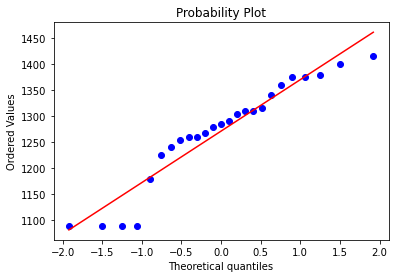

In [53]:
# Normal Quantile-Quantile Plot - Helps in understanding the distribution of the data - Normal distribution or not
import scipy.stats as stats
import pylab

# Checking whether data is normally distributed
stats.probplot(df_num.SAT, dist = "norm", plot = pylab)

((array([-1.9213301 , -1.50368257, -1.24941883, -1.0573306 , -0.897955  ,
         -0.75865603, -0.63273432, -0.51614096, -0.40618759, -0.30094875,
         -0.19894932, -0.09898372,  0.        ,  0.09898372,  0.19894932,
          0.30094875,  0.40618759,  0.51614096,  0.63273432,  0.75865603,
          0.897955  ,  1.0573306 ,  1.24941883,  1.50368257,  1.9213301 ]),
  array([ 50.,  50.,  50.,  50.,  62.,  65.,  74.,  75.,  75.,  76.,  77.,
          80.,  81.,  83.,  85.,  89.,  89.,  90.,  90.,  91.,  91.,  94.,
          95.,  95., 100.])),
 (15.548174662321602, 78.28, 0.9511295549439862))

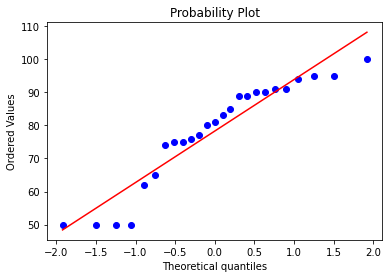

In [87]:
# Checking whether data is normally distributed
stats.probplot(df_num.Top10, dist = "norm", plot = pylab)

((array([-1.9213301 , -1.50368257, -1.24941883, -1.0573306 , -0.897955  ,
         -0.75865603, -0.63273432, -0.51614096, -0.40618759, -0.30094875,
         -0.19894932, -0.09898372,  0.        ,  0.09898372,  0.19894932,
          0.30094875,  0.40618759,  0.51614096,  0.63273432,  0.75865603,
          0.897955  ,  1.0573306 ,  1.24941883,  1.50368257,  1.9213301 ]),
  array([14., 14., 19., 20., 22., 23., 24., 24., 25., 30., 30., 33., 36.,
         39., 40., 42., 44., 44., 50., 54., 59., 67., 68., 69., 89.])),
 (19.806179416701234, 39.16, 0.9658230149511989))

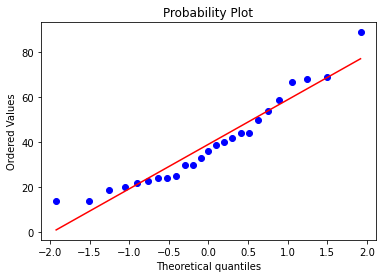

In [88]:
# Checking whether data is normally distributed
stats.probplot(df_num.Accept, dist = "norm", plot = pylab)

((array([-1.9213301 , -1.50368257, -1.24941883, -1.0573306 , -0.897955  ,
         -0.75865603, -0.63273432, -0.51614096, -0.40618759, -0.30094875,
         -0.19894932, -0.09898372,  0.        ,  0.09898372,  0.19894932,
          0.30094875,  0.40618759,  0.51614096,  0.63273432,  0.75865603,
          0.897955  ,  1.0573306 ,  1.24941883,  1.50368257,  1.9213301 ]),
  array([ 6.5,  7. ,  8. ,  9. , 10. , 10. , 11. , 11. , 11. , 11. , 12. ,
         12. , 12. , 12. , 12. , 13. , 13. , 13. , 14. , 15. , 16. , 17. ,
         18. , 18.5, 18.5])),
 (3.4058243652179456, 12.42, 0.9800284234738135))

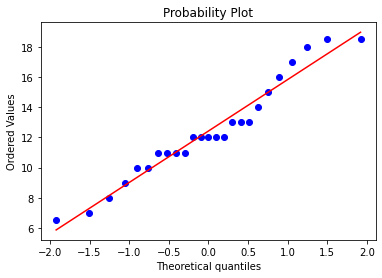

In [89]:
# Checking whether data is normally distributed
stats.probplot(df_num.SFRatio, dist = "norm", plot = pylab)

((array([-1.9213301 , -1.50368257, -1.24941883, -1.0573306 , -0.897955  ,
         -0.75865603, -0.63273432, -0.51614096, -0.40618759, -0.30094875,
         -0.19894932, -0.09898372,  0.        ,  0.09898372,  0.19894932,
          0.30094875,  0.40618759,  0.51614096,  0.63273432,  0.75865603,
          0.897955  ,  1.0573306 ,  1.24941883,  1.50368257,  1.9213301 ]),
  array([ 8704,  9066, 10185, 11857, 13349, 15122, 15140, 15470, 20126,
         21864, 22704, 25026, 27553, 28052, 30220, 31510, 31585, 32162,
         34870, 36450, 38380, 39525, 43514, 58691, 63575], dtype=int64)),
 (14567.431669324984, 27387.999999999996, 0.96623519023699))

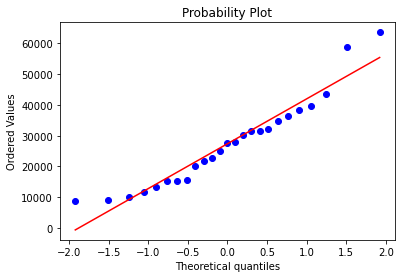

In [90]:
# Checking whether data is normally distributed
stats.probplot(df_num.Expenses, dist = "norm", plot = pylab)

((array([-1.9213301 , -1.50368257, -1.24941883, -1.0573306 , -0.897955  ,
         -0.75865603, -0.63273432, -0.51614096, -0.40618759, -0.30094875,
         -0.19894932, -0.09898372,  0.        ,  0.09898372,  0.19894932,
          0.30094875,  0.40618759,  0.51614096,  0.63273432,  0.75865603,
          0.897955  ,  1.0573306 ,  1.24941883,  1.50368257,  1.9213301 ]),
  array([67., 69., 71., 72., 78., 80., 80., 81., 85., 87., 87., 89., 90.,
         90., 91., 92., 92., 93., 94., 94., 95., 95., 95., 96., 97.])),
 (9.045184055962459, 86.4, 0.945664673489533))

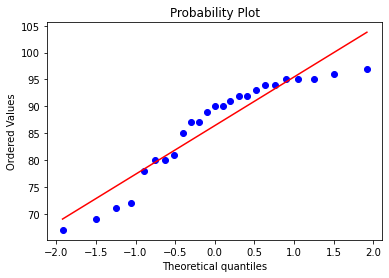

In [91]:
# Checking whether data is normally distributed
stats.probplot(df_num.GradRate, dist = "norm", plot = pylab)

### Concatenate the Entire Data

In [92]:
df1 = pd.concat([df_cate, df_num], axis = 1)  # Preprocessed data for clustering
df1.head()

,Univ,State_CT,State_DC,State_IL,State_IN,State_MA,State_MD,State_MI,State_NC,State_NH,...,State_RI,State_TX,State_VA,State_WI,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1310.0,89.0,22.0,13.0,22704,94.0
1,CalTech,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1415.0,100.0,25.0,6.5,63575,81.0
2,CMU,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1260.0,62.0,59.0,9.0,25026,72.0
3,Columbia,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1310.0,76.0,24.0,12.0,31510,80.0
4,Cornell,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1280.0,83.0,33.0,13.0,21864,90.0


In [55]:
df1.shape

(25, 23)

In [94]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 0 to 24
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Univ      25 non-null     object 
 1   State_CT  25 non-null     uint8  
 2   State_DC  25 non-null     uint8  
 3   State_IL  25 non-null     uint8  
 4   State_IN  25 non-null     uint8  
 5   State_MA  25 non-null     uint8  
 6   State_MD  25 non-null     uint8  
 7   State_MI  25 non-null     uint8  
 8   State_NC  25 non-null     uint8  
 9   State_NH  25 non-null     uint8  
 10  State_NJ  25 non-null     uint8  
 11  State_NY  25 non-null     uint8  
 12  State_PA  25 non-null     uint8  
 13  State_RI  25 non-null     uint8  
 14  State_TX  25 non-null     uint8  
 15  State_VA  25 non-null     uint8  
 16  State_WI  25 non-null     uint8  
 17  SAT       25 non-null     float64
 18  Top10     25 non-null     float64
 19  Accept    25 non-null     float64
 20  SFRatio   25 non-null     float64


## Bivariate Analysis

**Scatter Plot**

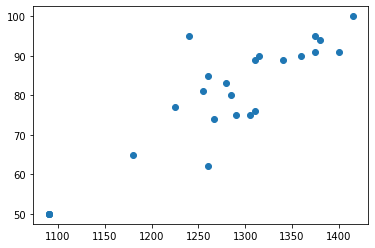

In [95]:
plt.scatter(x = df1['SAT'], y = df1['Top10']) 

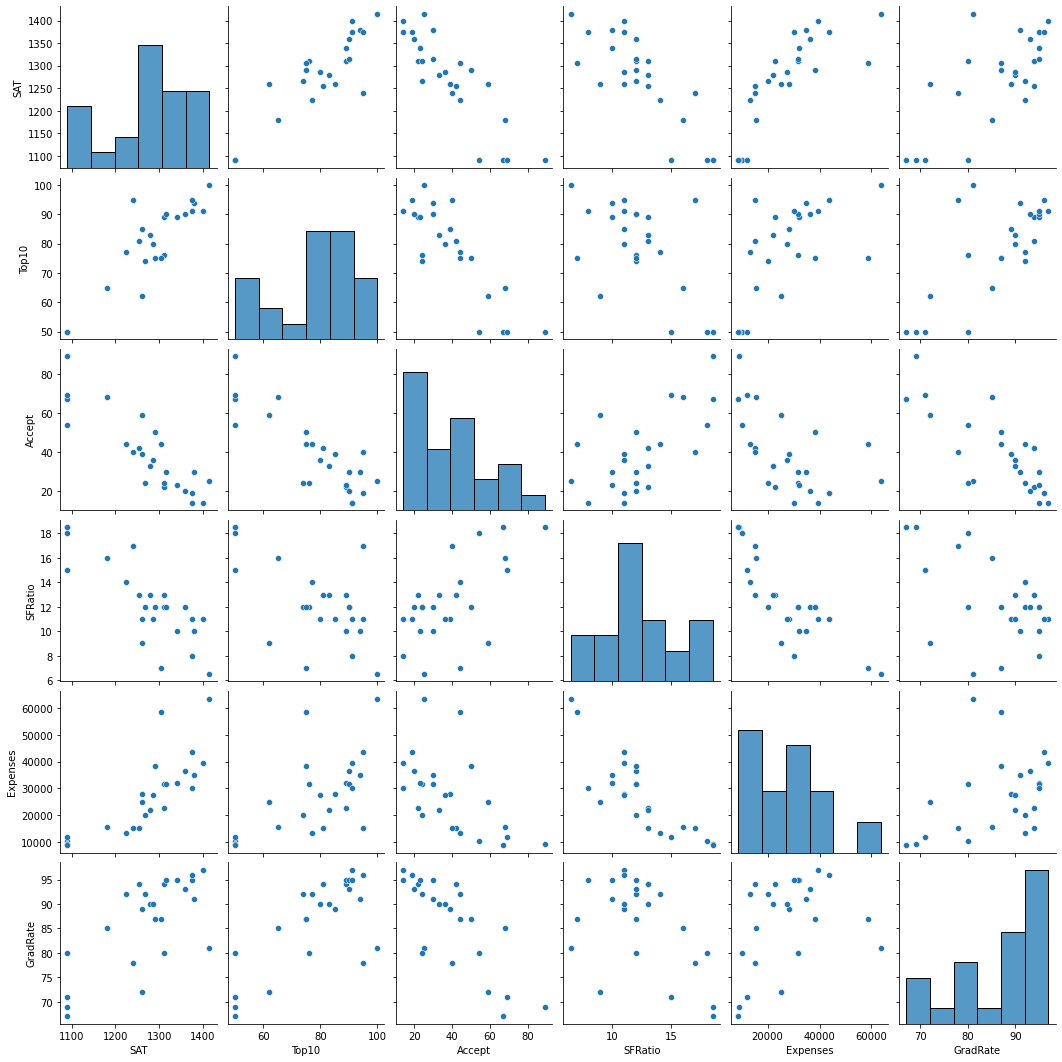

In [96]:
sns.pairplot(df_num)   # Use numerical variables for scatter plots


**Heatmap**

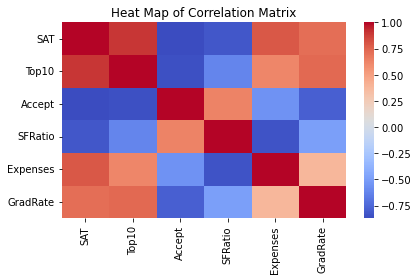

In [98]:
corrmatrix = df_num.corr(method = "pearson")

sns.heatmap(corrmatrix, xticklabels = corrmatrix.columns, yticklabels = corrmatrix.columns, cmap = "coolwarm")
plt.title('Heat Map of Correlation Matrix')
plt.tight_layout()
plt.show()

### 9) Scaling using Normalization:

The scale/magnitude of the data will be converted to min = 0 and max = 1

In [99]:
def norm_func(i):
  x = (i-i.min()) / (i.max()-i.min())
  return(x)

In [100]:
df_norm = norm_func(df1.iloc[:, 1:])

In [101]:
df_norm.describe()

,State_CT,State_DC,State_IL,State_IN,State_MA,State_MD,State_MI,State_NC,State_NH,State_NJ,...,State_RI,State_TX,State_VA,State_WI,SAT,Top10,Accept,SFRatio,Expenses,GradRate
count,25.00,25.00,25.000000,25.000000,25.000000,25.00,25.00,25.00,25.00,25.00,...,25.00,25.00,25.00,25.00,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,0.04,0.04,0.080000,0.080000,0.080000,0.04,0.04,0.04,0.04,0.04,...,0.04,0.04,0.04,0.04,0.558390,0.565600,0.335467,0.493333,0.340508,0.646667
std,0.20,0.20,0.276887,0.276887,0.276887,0.20,0.20,0.20,0.20,0.20,...,0.20,0.20,0.20,0.20,0.303338,0.312811,0.261610,0.277086,0.262887,0.305050
min,0.00,0.00,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00,0.00,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.461538,0.480000,0.133333,0.375000,0.117293,0.433333
50%,0.00,0.00,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.600000,0.620000,0.293333,0.458333,0.343515,0.766667
75%,0.00,0.00,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.769231,0.800000,0.480000,0.625000,0.476864,0.900000
max,1.00,1.00,1.000000,1.000000,1.000000,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# CLUSTERING MODEL BUILDING

### Hierarchical Clustering - Agglomerative Clustering

In [102]:
# Libraries for creating dendrogram 
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering 
import matplotlib.pyplot as plt

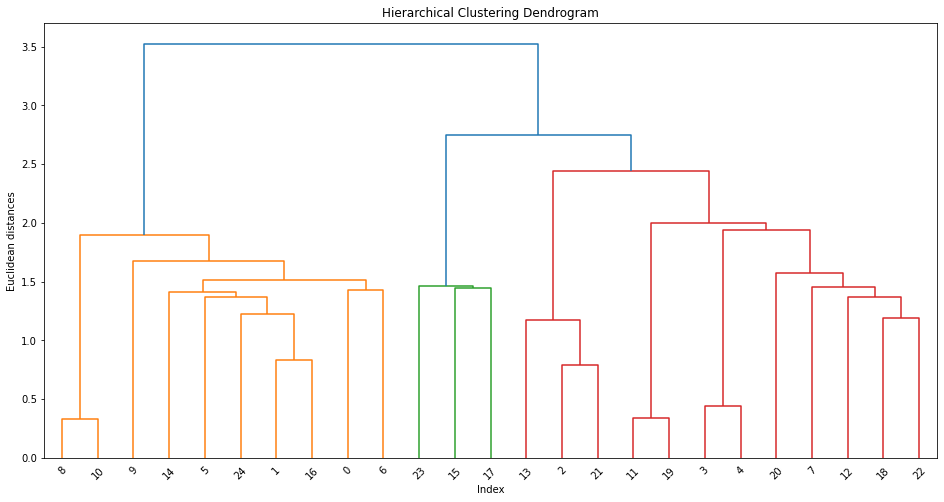

In [66]:
plt.figure(1, figsize = (16, 8))
tree_plot = dendrogram(linkage(df_norm, method  = "ward"))

plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Euclidean distances')
plt.show()

In [104]:
# Applying AgglomerativeClustering choosing 3 as clusters from the above dendrogram
hc1 = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'complete')

y_hc1 = hc1.fit_predict(df_norm)
y_hc1

array([1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1, 0, 1, 0, 1, 1, 0, 2,
       1, 0, 1], dtype=int64)

In [105]:
# Applying AgglomerativeClustering choosing 3 as clusters from the above dendrogram
hc2 = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'average')

y_hc2 = hc2.fit_predict(df_norm)
y_hc2

array([1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1, 0, 1, 0, 1, 1, 0, 2,
       1, 0, 1], dtype=int64)

In [106]:
# Applying AgglomerativeClustering choosing 3 as clusters from the above dendrogram
hc3 = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'single')

y_hc3 = hc3.fit_predict(df_norm)
y_hc3

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 1, 0], dtype=int64)

In [107]:
hc1.labels_   # Refering to the results obtained from linkage = 'complete' method

array([1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1, 0, 1, 0, 1, 1, 0, 2,
       1, 0, 1], dtype=int64)

In [108]:
cluster_labels = pd.Series(hc1.labels_)

In [109]:
# Add Cluster labels to orignal Dataset

df['cluster'] = cluster_labels
df.head()

,Univ,State,SAT,Top10,Accept,SFRatio,Expenses,GradRate,cluster
0,Brown,RI,1310.0,89,22,13.0,22704,94.0,1
1,CalTech,CA,1415.0,100,25,6.0,63575,81.0,1
2,CMU,PA,1260.0,62,59,9.0,25026,72.0,2
3,Columbia,NY,1310.0,76,24,12.0,31510,80.0,1
4,Cornell,NY,1280.0,83,33,13.0,21864,90.0,1


# Cluster Evaluation

In [110]:
df.head() # The final dataframe with cluster ID's

,Univ,State,SAT,Top10,Accept,SFRatio,Expenses,GradRate,cluster
0,Brown,RI,1310.0,89,22,13.0,22704,94.0,1
1,CalTech,CA,1415.0,100,25,6.0,63575,81.0,1
2,CMU,PA,1260.0,62,59,9.0,25026,72.0,2
3,Columbia,NY,1310.0,76,24,12.0,31510,80.0,1
4,Cornell,NY,1280.0,83,33,13.0,21864,90.0,1


In [74]:
df2 = df.sort_values(by = 'cluster', ascending = True)
df2

,Univ,State,SAT,Top10,Accept,SFRatio,Expenses,GradRate,cluster
12,NotreDame,IN,1255.000000,81,42,13.0,15122,94.0,0
20,UMichigan,MI,1180.000000,65,68,16.0,15470,85.0,0
17,TexasA&M,TX,1075.000000,49,67,25.0,8704,67.0,0
15,Purdue,IN,1005.000000,28,90,19.0,9066,69.0,0
23,UWisconsin,WI,1085.000000,40,69,15.0,11857,71.0,0
22,UVA,VA,1225.000000,77,44,14.0,13349,92.0,1
19,UChicago,IL,1290.000000,75,50,12.0,38380,87.0,1
18,UCBerkeley,CA,1240.000000,95,40,17.0,15140,78.0,1
16,Stanford,CA,1360.000000,90,20,12.0,36450,93.0,1
14,Princeton,NJ,1375.000000,91,14,8.0,30220,95.0,1


In [75]:
# Aggregate by doing mean of each cluster
df2.iloc[:, 2:9].groupby(df2.cluster).mean()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate,cluster
cluster,,,,,,,
0,1120.000000,52.600000,67.200000,17.600000,12043.800000,77.200000,0.0
1,1320.406863,86.411765,29.117647,11.235294,33042.176471,90.117647,1.0
2,1208.666667,60.000000,49.666667,12.666667,20921.333333,80.666667,2.0


In [76]:
cluster0 = df2.loc[(df2.cluster == 0), :]
cluster0

,Univ,State,SAT,Top10,Accept,SFRatio,Expenses,GradRate,cluster
12,NotreDame,IN,1255.0,81,42,13.0,15122,94.0,0
20,UMichigan,MI,1180.0,65,68,16.0,15470,85.0,0
17,TexasA&M,TX,1075.0,49,67,25.0,8704,67.0,0
15,Purdue,IN,1005.0,28,90,19.0,9066,69.0,0
23,UWisconsin,WI,1085.0,40,69,15.0,11857,71.0,0


In [111]:
cluster1 = df2.loc[(df2.cluster == 1), :]
cluster1

,Univ,State,SAT,Top10,Accept,SFRatio,Expenses,GradRate,cluster
22,UVA,VA,1225.000000,77,44,14.0,13349,92.0,1
19,UChicago,IL,1290.000000,75,50,12.0,38380,87.0,1
18,UCBerkeley,CA,1240.000000,95,40,17.0,15140,78.0,1
16,Stanford,CA,1360.000000,90,20,12.0,36450,93.0,1
14,Princeton,NJ,1375.000000,91,14,8.0,30220,95.0,1
11,Northwestern,IL,1260.000000,85,39,11.0,28052,89.0,1
0,Brown,RI,1310.000000,89,22,13.0,22704,94.0,1
9,JohnsHopkins,MD,1305.000000,75,44,7.0,58691,87.0,1
8,Harvard,MA,1400.000000,91,14,11.0,39525,97.0,1
7,Georgetown,DC,1266.916667,74,24,12.0,20126,92.0,1


In [112]:
cluster2 = df2.loc[(df2.cluster == 2), :]
cluster2

,Univ,State,SAT,Top10,Accept,SFRatio,Expenses,GradRate,cluster
13,PennState,PA,1081.0,38,54,18.0,10185,80.0,2
2,CMU,PA,1260.0,62,59,9.0,25026,72.0,2
21,UPenn,PA,1285.0,80,36,11.0,27553,90.0,2


In [113]:
cluster0.to_csv('University_0.csv', encoding = 'utf-8')
import os
os.getcwd()

'C:\\Users\\Bharani Kumar'

In [114]:
cluster1.to_csv('University_1.csv', encoding = 'utf-8')
import os
os.getcwd()

'C:\\Users\\Bharani Kumar'

In [115]:
cluster2.to_csv('University_2.csv', encoding = 'utf-8')
import os
os.getcwd()

'C:\\Users\\Bharani Kumar'

C:\Users\Bharani Kumar\anaconda3\lib\site-packages\dtale\views.py:1929: FutureWarning:

The default value of regex will change from True to False in a future version.



## Another way of evaluating clusters is using outliers

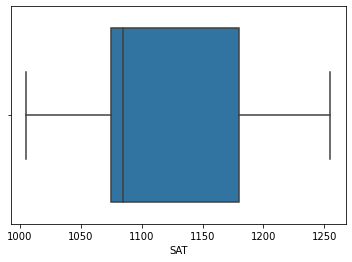

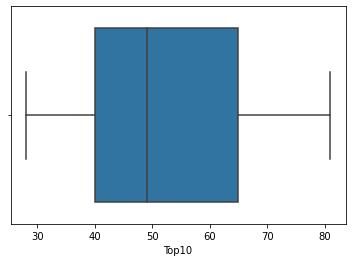

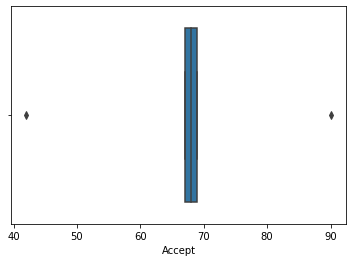

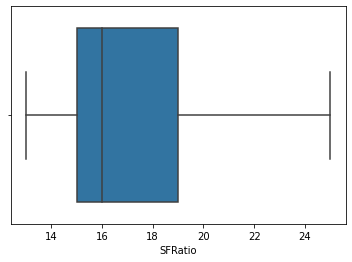

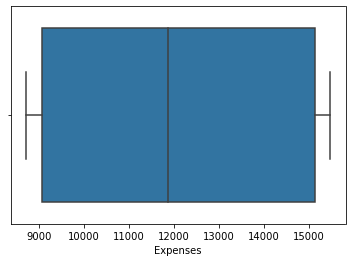

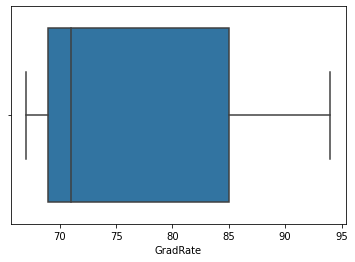

In [82]:
for i in cluster0.columns[2:8]:
  sns.boxplot(x = cluster0[i])
  plt.show()

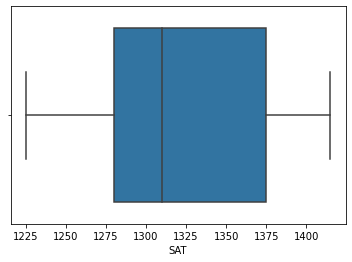

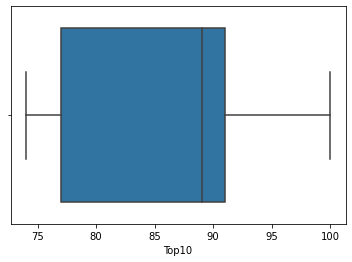

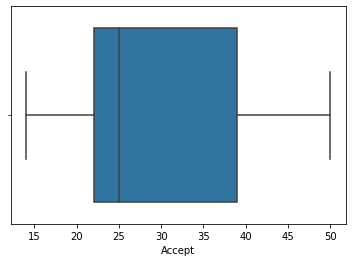

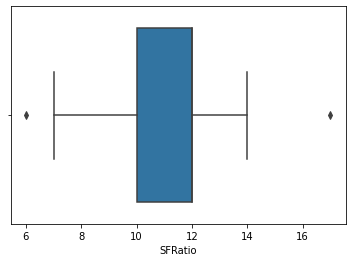

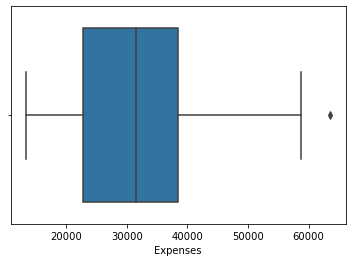

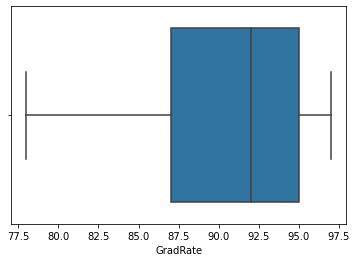

In [83]:
for i in cluster1.columns[2:8]:
  sns.boxplot(x = cluster1[i])
  plt.show()

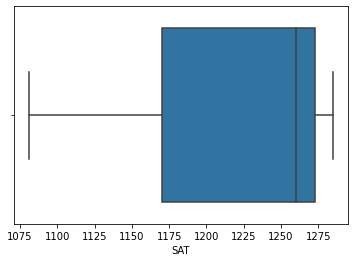

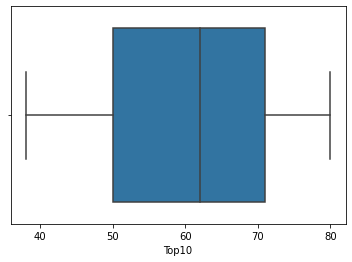

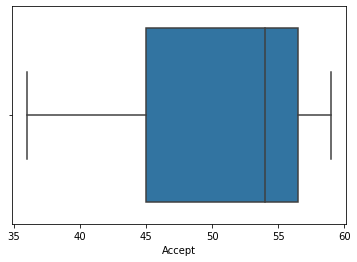

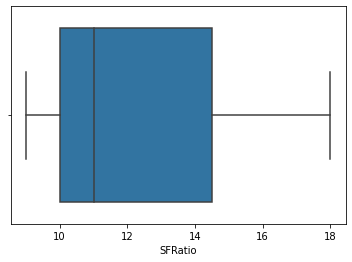

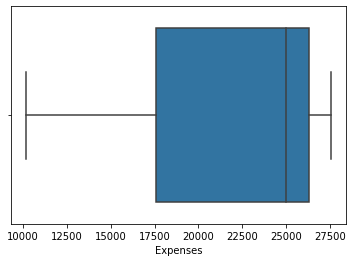

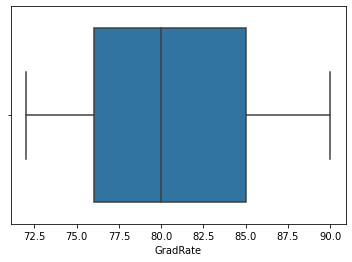

In [84]:
for i in cluster2.columns[2:8]:
  sns.boxplot(x = cluster2[i])
  plt.show()